In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter, MonthLocator,DayLocator,
                              rrulewrapper, WeekdayLocator,RRuleLocator, drange)
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.colors as colors
import matplotlib.patches as mpatches

import numpy as np
from datetime import datetime,timedelta
import seaborn as sns
%matplotlib inline

import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

In [2]:
#url de la fuente de datos
path_fuente_datos_iscii='https://cnecovid.isciii.es/covid19/resources/casos_hosp_uci_def_sexo_edad_provres.csv'


In [3]:
raw_data = pd.read_csv(path_fuente_datos_iscii)

In [4]:
raw_data.columns

Index(['provincia_iso', 'sexo', 'grupo_edad', 'fecha', 'num_casos', 'num_hosp',
       'num_uci', 'num_def'],
      dtype='object')

In [5]:
raw_data['provincia_iso'].unique()

array(['A', 'AB', 'AL', 'AV', 'B', 'BA', 'BI', 'BU', 'C', 'CA', 'CC',
       'CE', 'CO', 'CR', 'CS', 'CU', 'GC', 'GI', 'GR', 'GU', 'H', 'HU',
       'J', 'L', 'LE', 'LO', 'LU', 'M', 'MA', 'ML', 'MU', nan, 'NC', 'O',
       'OR', 'P', 'PM', 'PO', 'S', 'SA', 'SE', 'SG', 'SO', 'SS', 'T',
       'TE', 'TF', 'TO', 'V', 'VA', 'VI', 'Z', 'ZA'], dtype=object)

In [27]:
datos = raw_data.copy()

In [28]:
datos = datos.groupby(['fecha','grupo_edad'])['num_casos'].sum().reset_index()

In [29]:
datos['fecha'] = pd.to_datetime(datos['fecha'],format='%Y-%m-%d')

In [30]:
datos = pd.pivot_table(datos,columns=['grupo_edad'],index='fecha')

In [31]:
datos.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2021-06-29', '2021-06-30', '2021-07-01', '2021-07-02',
               '2021-07-03', '2021-07-04', '2021-07-05', '2021-07-06',
               '2021-07-07', '2021-07-08'],
              dtype='datetime64[ns]', name='fecha', length=555, freq=None)

In [32]:
datos = datos.loc[datos.index >= datetime(year=2020,month=3,day=1)]

In [33]:
datos.columns = datos.columns.droplevel()


In [34]:
datos = datos.rolling(window=7).mean()

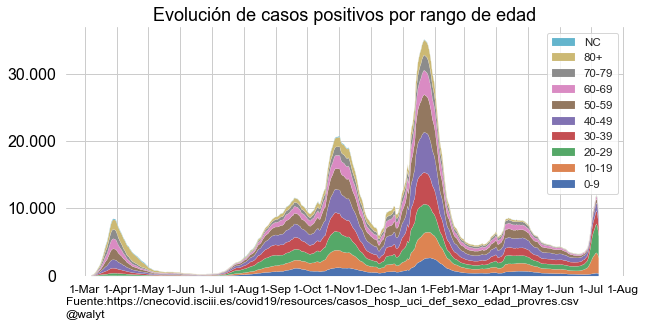

In [38]:
XmajorFmt = DateFormatter('%-d-%-b')
fmt = ':.0f' # Format you want the ticks, e.g. '40%'
color_ejes = 'black'
color_titulos = 'black'
color_total='black'
color_covid='red'
sns.set(style='white')
titulo = 'Evolución de casos positivos por rango de edad'
fuente = path_fuente_datos_iscii
autor='@walyt'
fig, ax = plt.subplots(figsize=(10,5))
labels=datos.columns
ax.stackplot(datos.index,datos['0-9'],datos['10-19'],datos['20-29'],
                     datos['30-39'],datos['40-49'],datos['50-59'],
                    datos['60-69'],datos['70-79'],datos['80+'],datos['NC'],labels=labels,lw=0.1)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],loc='upper right',fontsize=11.5)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x,v:'{:,.0f}'.format(x).replace(',','.')))
    
ax.yaxis.set_tick_params(labelsize=16,width=0,labelcolor=color_ejes)
    #ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.xaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_ejes,rotation=0)
ax.xaxis.set_major_formatter(XmajorFmt)
ax.xaxis.set_major_locator(DayLocator([1]))
sns.despine(left=True, bottom=True)
ax.grid(True)

ax.set_title('{}'.format(titulo),fontsize=18,color=color_titulos)
ax.text(x=0,y=-.12,s='Fuente:{}'.format(fuente),color=color_titulos,fontsize=12,transform=ax.transAxes)
ax.text(x=0.0,y=-.17,s=autor,color=color_titulos,fontsize=12,transform=ax.transAxes)
fig.subplots_adjust(top=.85,bottom=.16,wspace=0.3,hspace=0.15)
#plt.tight_layout()
plt.savefig('Evolucion_absolutos.png',dpi=288,bbox_inches='tight')  

plt.show()


In [39]:
datos2 = datos.apply(lambda x: x/x.sum(),axis=1)

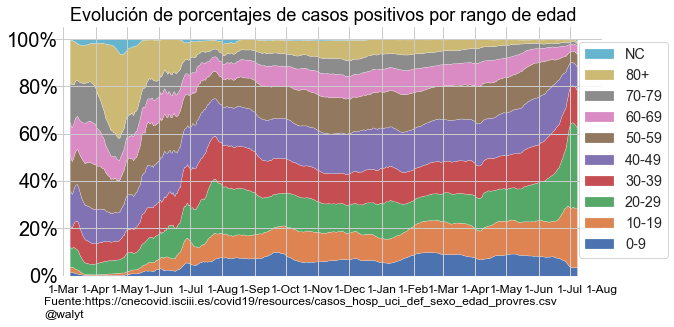

In [40]:
XmajorFmt = DateFormatter('%-d-%-b')
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
color_ejes = 'black'
color_titulos = 'black'
color_total='black'
color_covid='red'
sns.set(style='white')
titulo = 'Evolución de porcentajes de casos positivos por rango de edad'
fuente = path_fuente_datos_iscii


fig, ax = plt.subplots(figsize=(10,5))
labels=datos2.columns
ax.stackplot(datos2.index,datos2['0-9'],datos2['10-19'],datos2['20-29'],
                     datos2['30-39'],datos2['40-49'],datos2['50-59'],
                    datos2['60-69'],datos2['70-79'],datos2['80+'],datos2['NC'],labels=labels,lw=.2,zorder=0)

#ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles[::-1], labels[::-1],loc='upper right',fontsize='large',bbox_to_anchor=(1.13,.97))
#legend.get_frame().set_alpha(0)
#ax.legend(loc='upper right',fontsize='x-large',bbox_to_anchor=(1.06,1))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x,v:'{:,.0%}'.format(x)))
ax.yaxis.set_tick_params(labelsize=20,width=0,pad=-20,labelcolor=color_ejes)
    #ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.xaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_ejes,rotation=0)
ax.xaxis.set_major_formatter(XmajorFmt)
ax.xaxis.set_major_locator(DayLocator([1]))

sns.despine(left=True, bottom=True)

ax.set_title('{}'.format(titulo),fontsize=18,color=color_titulos)
ax.text(x=0,y=-.12,s='Fuente:{}'.format(fuente),color=color_titulos,fontsize=12,transform=ax.transAxes)
ax.text(x=0.0,y=-.17,s=autor,color=color_titulos,fontsize=12,transform=ax.transAxes)
plt.grid(True)
fig.subplots_adjust(top=.85,bottom=.16,wspace=0.3,hspace=0.15)
#plt.tight_layout()
plt.savefig('Evolucion_porcentajes.png',dpi=288,bbox_inches='tight')  


# Facetgrid : por provincias

In [17]:
datos = raw_data.copy()

In [18]:
datos = datos.groupby(['fecha','provincia_iso','grupo_edad'])['num_casos'].sum().reset_index()

In [19]:
datos

,fecha,provincia_iso,grupo_edad,num_casos
0,2020-01-01,A,0-9,0
1,2020-01-01,A,10-19,0
2,2020-01-01,A,20-29,0
3,2020-01-01,A,30-39,0
4,2020-01-01,A,40-49,0
...,...,...,...,...
288595,2021-07-08,ZA,50-59,0
288596,2021-07-08,ZA,60-69,0
288597,2021-07-08,ZA,70-79,0
288598,2021-07-08,ZA,80+,0


In [20]:
orden_provincias= ['AL','CA','CO','GR','H','J','MA','SE', 
                   'CE',
             'HU','TE','Z',
                   'AB','CR','CU','GU','TO',
                   'AV','BU','LE','P','SA','SG','SO','VA','ZA',
                   'B','GI','L','T',
                   'BA','CC',
                   'C','LU','OR','PO',
                   
             'GC','TF',
                   'M',
                   'ML',
                   'MU',
             'NC',
                   'O',
                   'VI','BI','SS',
                   'PM',
                   'LO',
                   
             'S',
                   'A','CS','V']

In [21]:
provincias = {'AL':('Almeria','Andalucía'), 'AB':('Albacete','Castilla La Mancha'),
              'A':('Alicante','Comunidad Valenciana'),'AV':('Ávila','Castilla Leon'),'B':('Barcelona','Cataluña'),
              'BA':('Badajoz','Extremadura'),'BI':('Bilbao','Pais Vasco'), 'BU':('Burgos','Castilla y León'), 
              'C':('A Coruña','Galicia'), 'CA':('Cádiz','Andalucía'), 'CC':('Cáceres','Extremadura'),
              'CE':('Ceuta','Ceuta'), 'CO':('Córdoba','Andalucía'), 'CR':('Ciudad Real','Castilla La Mancha'),
              'CS':('Castellón','Comunidad Valenciana'), 'CU':('Cuenca','Castilla La Mancha'),
              'GC':('Gran Canaria','Canarias'), 'GI':('Girona','Cataluña'),
              'GR':('Granada','Andalucía'), 'GU':('Guadalajara','Castilla La Mancha'), 'H':('Huelva','Andalucía'),
              'HU':('Huesca','Aragón'),'J':('Jaén','Andalucía'),
              'L':('Lleida','Cataluña'),
              'LE':('León','Castilla León'), 'LO':('Logroño','La Rioja'), 'LU':('Lugo','Galicia'),'M':('Madrid','Madrid'),
              'MA':('Málaga','Andalucía'), 'ML':('Melilla','Melilla'),
              'MU':('Murcia','Comunidad de Murcia'),'nan':'NaN', 'NC':('Navarra','Comunidad Foral Navarra'),
              'O':('Oviedo','Principado Asturias'),
              'OR':('Orense','Galicia'), 'P':('Palencia','Castilla y León'),'PM':('Palma Mallorca','Mallorca'),
              'PO':('Pontevedra','Galicia'), 'S':('Santader','Cantabria'),
              'SA':('Salamanca', 'Castilla y León'),'SE':('Sevilla','Andalucía'), 'SG':('Segovia','Castilla y León'),
              'SO':('Soria','Castilla y León'), 'SS':('San Sebastián','País Vasco'), 'T':('Tarragona','Cataluña'),
              'TE':('Teruel','Aragón'), 'TF':('Tenerife','Canarias'), 'TO':('Toledo','Castilla La Mancha'),
              'V':('Valencia','Comunidad Valenciana'), 'VA':('Valladolid','Castilla y León'), 
              'VI':('Vitoria','País Vasco'),'Z':('Zaragoza','Aragón'), 'ZA':('Zamora','Castilla y León')}

In [22]:
datos['provincia_iso'].unique()

array(['A', 'AB', 'AL', 'AV', 'B', 'BA', 'BI', 'BU', 'C', 'CA', 'CC',
       'CE', 'CO', 'CR', 'CS', 'CU', 'GC', 'GI', 'GR', 'GU', 'H', 'HU',
       'J', 'L', 'LE', 'LO', 'LU', 'M', 'MA', 'ML', 'MU', 'NC', 'O', 'OR',
       'P', 'PM', 'PO', 'S', 'SA', 'SE', 'SG', 'SO', 'SS', 'T', 'TE',
       'TF', 'TO', 'V', 'VA', 'VI', 'Z', 'ZA'], dtype=object)

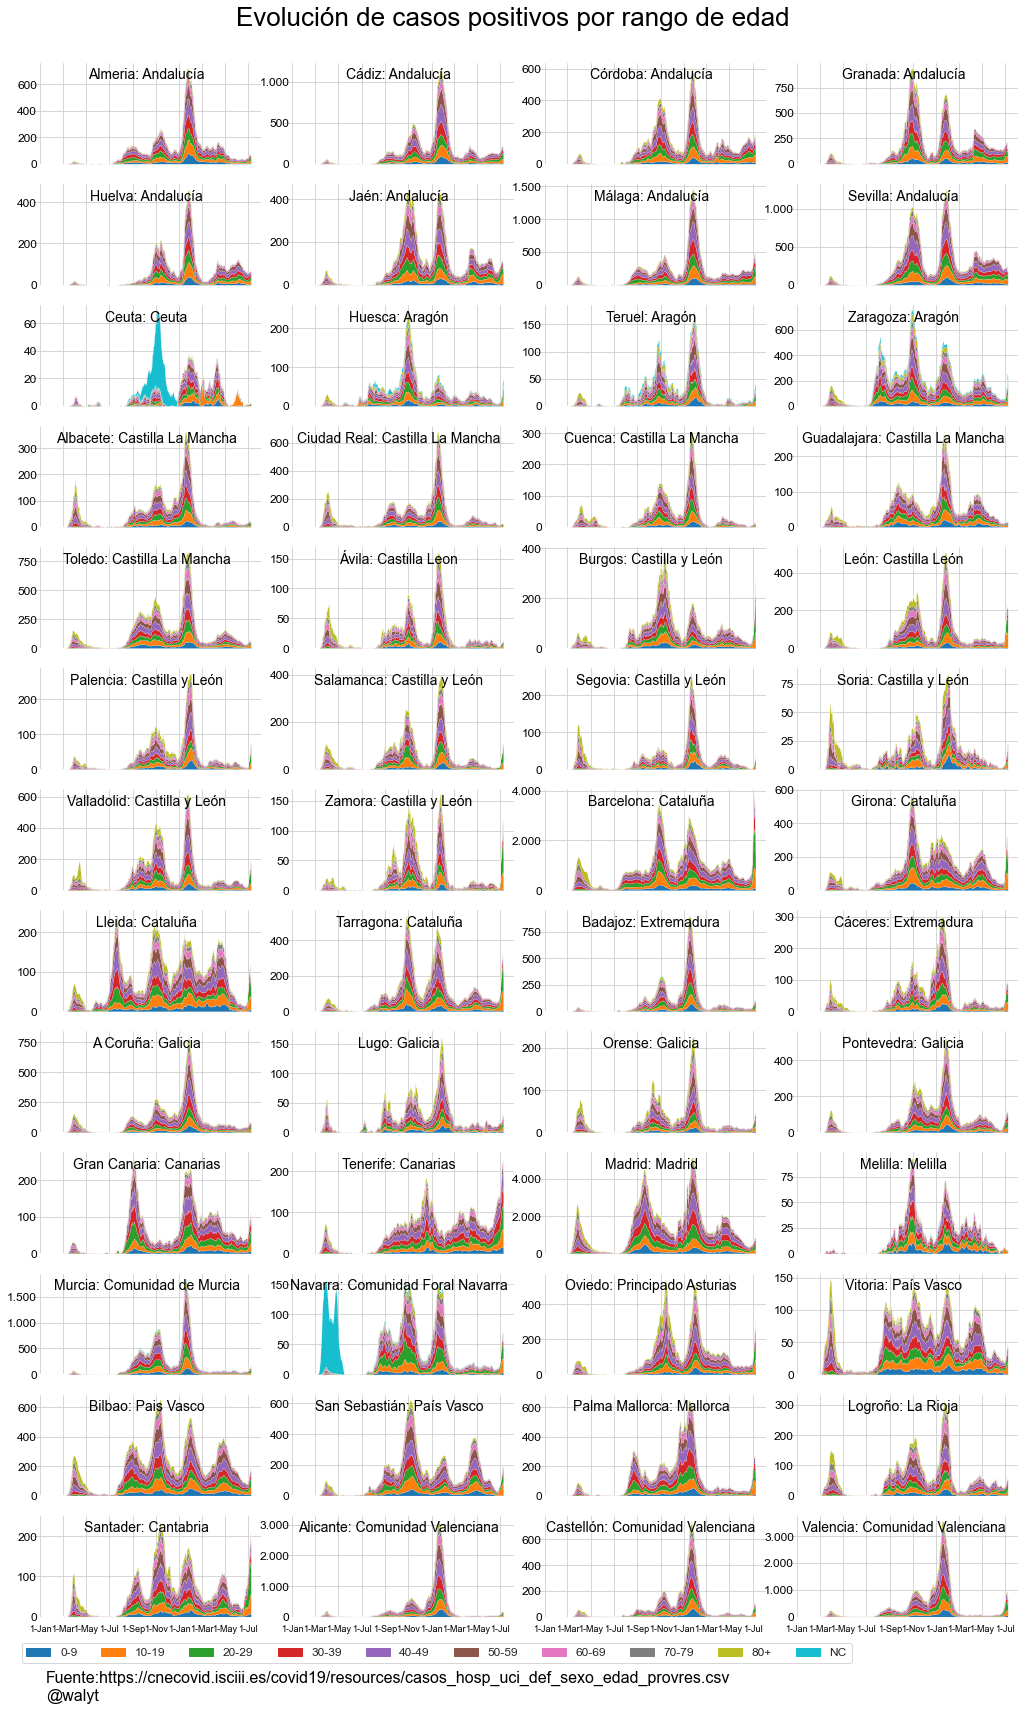

In [23]:
XmajorFmt = DateFormatter('%-d-%-b')
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
color_ejes = 'black'
color_titulos = 'black'
color_total='black'
color_covid='red'
sns.set(style='white')
titulo = 'Evolución de casos positivos por rango de edad'
fuente = path_fuente_datos_iscii

colores = sns.color_palette("tab10")
#colores = sns.color_palette("hls",10)


with sns.plotting_context('paper', font_scale = 1.3):
    g = sns.FacetGrid(datos,col='provincia_iso',hue='provincia_iso',col_wrap=4,aspect=1.8, 
                      margin_titles=False,height=2.0,sharey=False,col_order=orden_provincias)
    

def grafica(x, color, label):
    ax1 = plt.gca()
    datos2 = datos[datos['provincia_iso']==label].groupby(['fecha','grupo_edad'])['num_casos'].sum().reset_index()
    datos2['fecha'] = pd.to_datetime(datos2['fecha'],format='%Y-%m-%d')
    datos2 = pd.pivot_table(datos2,columns=['grupo_edad'],index='fecha')
    #datos2 = datos2.loc[datos2.index >= datetime(year=2020,month=8,day=1)]
    datos2.columns = datos2.columns.droplevel()
    datos2 = datos2.rolling(window=7).mean()
    #datos2 = datos2.apply(lambda x: x/x.sum(),axis=1)
    labels=datos2.columns
    ax1.stackplot(datos2.index,datos2['0-9'],datos2['10-19'],datos2['20-29'],
                  datos2['30-39'],datos2['40-49'],datos2['50-59'],datos2['60-69'],datos2['70-79'],
                  datos2['80+'],datos2['NC'],labels=labels,lw=.1,colors=colores)
    #ax1.yaxis.set_major_formatter(FuncFormatter(lambda x,v:'{:,.f}'.format(x)))
    ax1.yaxis.set_major_formatter(FuncFormatter(lambda x,v:'{:,.0f}'.format(x).replace(',','.')))
    
    ax1.yaxis.set_tick_params(labelsize=12,width=0,pad=-10,labelcolor=color_ejes)
    #ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax1.xaxis.set_tick_params(labelsize=9,width=0,labelcolor=color_ejes,rotation=0)
    ax1.xaxis.set_major_formatter(XmajorFmt)
    ax1.grid(True,axis='both',which='both')
    ax1.text(0.5, .88, s=provincias[label][0]+': '+provincias[label][1], fontweight="regular", color=color_titulos,
            ha="center", va="center", size=14,transform=ax1.transAxes)

    
patches = [mpatches.Patch(color=colores[i],label=datos['grupo_edad'].unique()[i]) for i in range(10)]
g.map(grafica,'provincia_iso')
#g.set_titles(col_template="{col_name}",size=14)
g.set_titles(col_template='')
g.set(xlabel='',ylabel='')
sns.despine(left=True, bottom=True)
g.fig.text(x=0.05,y=.085,s='Fuente:{}'.format(fuente),color=color_titulos,fontsize=16,ha='left')
g.fig.text(x=0.05,y=.075,s=autor,color=color_titulos,fontsize=16)
g.fig.suptitle('{}'.format(titulo),fontsize=26,color=color_titulos)
plt.legend(handles=patches,bbox_to_anchor=(0.3, -0.2),fontsize='medium',ncol=10)
g.fig.subplots_adjust(top=.95,bottom=.12,wspace=.1,hspace=0.2)
#plt.tight_layout()

plt.savefig('Evolucion_distribución_edad_provincias.png',dpi=288,bbox_inches='tight')  


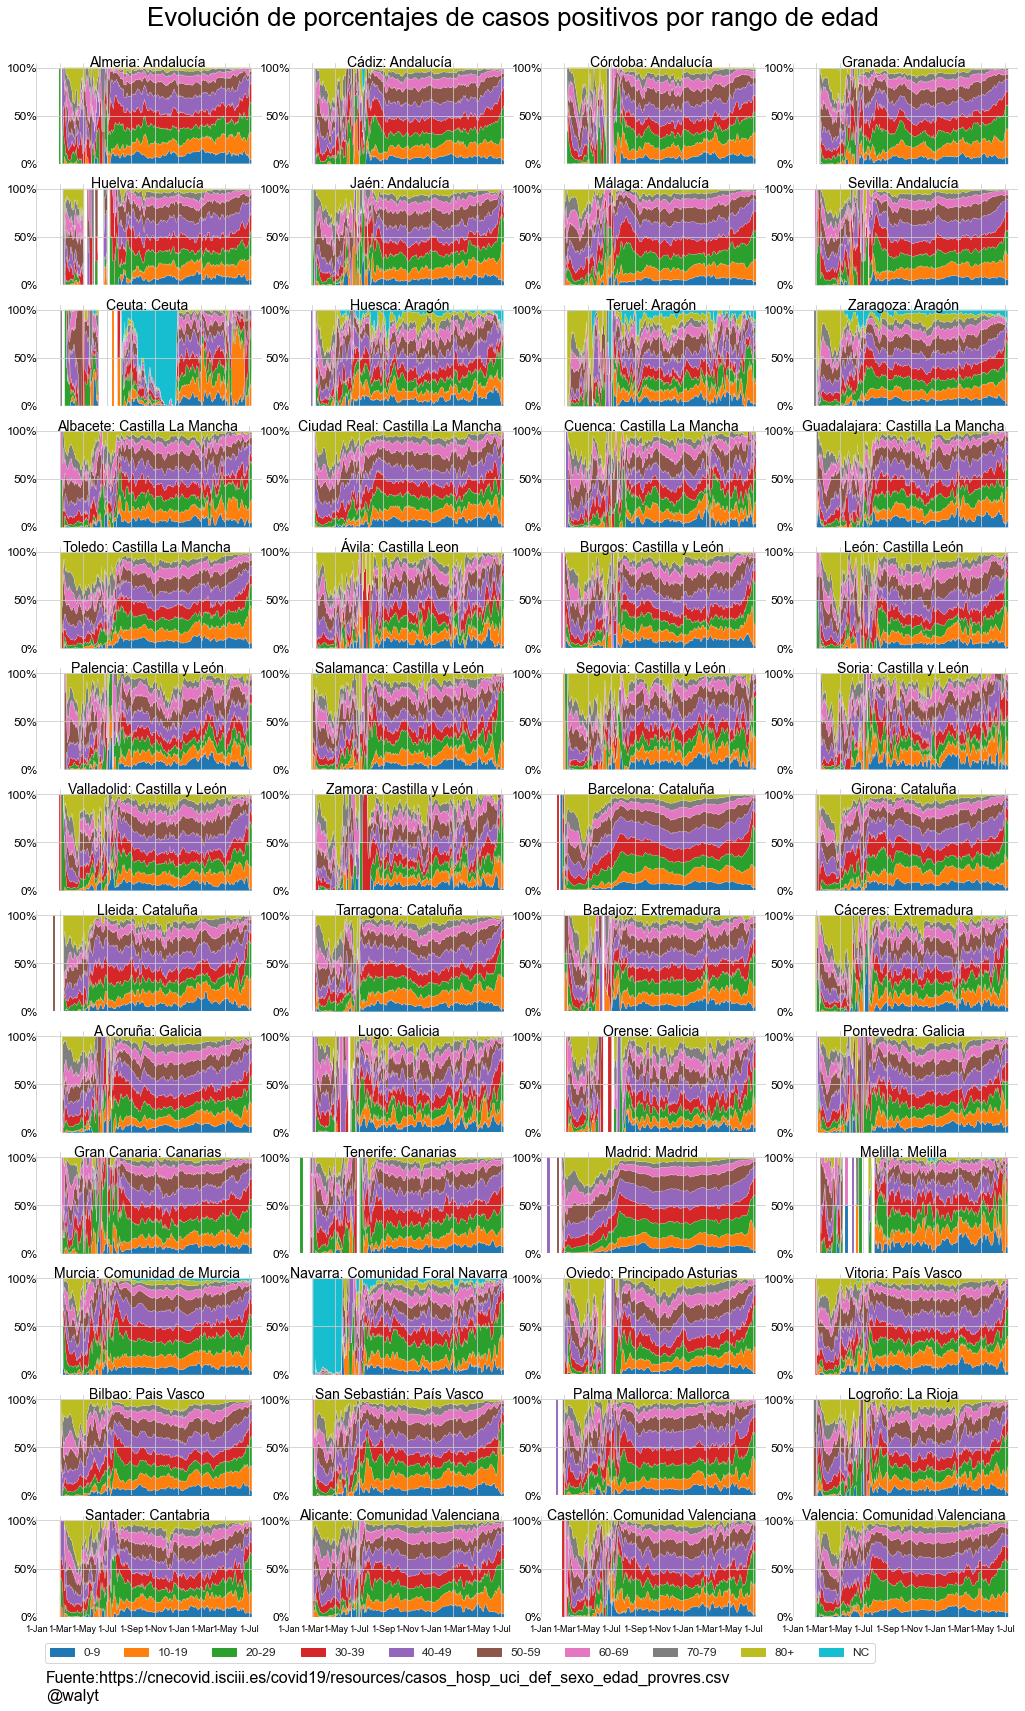

In [24]:
XmajorFmt = DateFormatter('%-d-%-b')
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
color_ejes = 'black'
color_titulos = 'black'
color_total='black'
color_covid='red'
sns.set(style='white')
titulo = 'Evolución de porcentajes de casos positivos por rango de edad'
fuente = path_fuente_datos_iscii

colores = sns.color_palette("tab10")
#colores = sns.color_palette("hls",10)


with sns.plotting_context('paper', font_scale = 1.3):
    g = sns.FacetGrid(datos,col='provincia_iso',hue='provincia_iso',col_wrap=4,aspect=1.8, 
                      margin_titles=False,height=2.0,sharey=False,col_order=orden_provincias)
    

def grafica(x, color, label):
    ax1 = plt.gca()
    datos2 = datos[datos['provincia_iso']==label].groupby(['fecha','grupo_edad'])['num_casos'].sum().reset_index()
    datos2['fecha'] = pd.to_datetime(datos2['fecha'],format='%Y-%m-%d')
    datos2 = pd.pivot_table(datos2,columns=['grupo_edad'],index='fecha')
    #datos2 = datos2.loc[datos2.index >= datetime(year=2020,month=8,day=1)]
    datos2.columns = datos2.columns.droplevel()
    datos2 = datos2.rolling(window=7).mean()
    datos2 = datos2.apply(lambda x: x/x.sum(),axis=1)
    labels=datos2.columns
    ax1.stackplot(datos2.index,datos2['0-9'],datos2['10-19'],datos2['20-29'],
                  datos2['30-39'],datos2['40-49'],datos2['50-59'],datos2['60-69'],datos2['70-79'],
                  datos2['80+'],datos2['NC'],labels=labels,lw=.1,colors=colores,zorder=0)
    ax1.yaxis.set_major_formatter(FuncFormatter(lambda x,v:'{:,.0%}'.format(x)))
    #ax1.yaxis.set_major_formatter(FuncFormatter(lambda x,v:'{:,.0f}'.format(x).replace(',','.')))
    
    ax1.yaxis.set_tick_params(labelsize=12,width=0,pad=-10,labelcolor=color_ejes)
    #ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax1.xaxis.set_tick_params(labelsize=9,width=0,labelcolor=color_ejes,rotation=0)
    ax1.xaxis.set_major_formatter(XmajorFmt)
    ax1.grid(True,axis='both',which='both')
    ax1.text(0.5, 1.0, s=provincias[label][0]+': '+provincias[label][1], fontweight="regular", color=color_titulos,
            ha="center", va="center", size=14,transform=ax1.transAxes)

    
patches = [mpatches.Patch(color=colores[i],label=datos['grupo_edad'].unique()[i]) for i in range(10)]
g.map(grafica,'provincia_iso')
#g.set_titles(col_template="{col_name}",size=14)
g.set_titles(col_template='')
g.set(xlabel='',ylabel='')
sns.despine(left=True, bottom=True)
g.fig.text(x=0.05,y=.085,s='Fuente:{}'.format(fuente),color=color_titulos,fontsize=16,ha='left')
g.fig.text(x=0.05,y=.075,s=autor,color=color_titulos,fontsize=16)
g.fig.suptitle('{}'.format(titulo),fontsize=26,color=color_titulos)
plt.legend(handles=patches,bbox_to_anchor=(0.4, -0.2),fontsize='medium',ncol=10)
g.fig.subplots_adjust(top=.95,bottom=.12,wspace=.1,hspace=0.2)
#plt.tight_layout()

plt.savefig('Evolucion_positivos_%_edad_provincias.png',dpi=288,bbox_inches='tight')  
